# This notebook shows how to run the hard-coded 2-step QPS circuits, from QuantumPartonShower_ReM_2step_hardcode.py

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [38]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, compiler, circuit, compiler
import math
import time
import matplotlib.pyplot as plt

import QuantumPartonShower as qps
import QuantumPartonShower_ReM as qpsc
import MakeObservables as mo
import classical 

import plotting_old as pl
import plotting as p
import matplotlib

In [3]:
import QuantumPartonShower_ReM_2step_hardcode as qps_rhs

## Define parameters

In [86]:
eps= 0.001
g_1= 2
g_2= 1
initialParticles= ['100'] # f1
#initialParticles= ['101'] # f2

shots= 10000

## Create circuits

In [87]:
qps0= qps_rhs.QuantumPartonShower() # for g12= 0
qps1= qps_rhs.QuantumPartonShower() # for g12= 1

qc0, qubits0= qps0.createCircuit(eps, g_1, g_2, 0, initialParticles)
qc1, qubits1= qps1.createCircuit(eps, g_1, g_2, 1, initialParticles)

Applying step 1.
Applying step 2.
Done.

Applying step 1.
Applying step 2.
Done.



## Simulate circuits and store results

In [88]:
print('Qubits: ' + str(qc0.num_qubits))
print('Gates: ' + str(qc0.count_ops()))

t1= time.time()
counts0= qps0.simulate('qasm', shots=shots)
t2= time.time()
counts1= qps1.simulate('qasm', shots=shots)
t3= time.time()

print('\nTime to simulate withg g12= 0: ' + str(t2-t1))
print('Time to simulate withg g12= 1: ' + str(t3-t2))

Qubits: 12
Gates: OrderedDict([('x', 20), ('cu3', 8), ('measure', 5), ('reset', 3), ('cry', 3), ('cx', 2), ('ry', 1), ('h', 1), ('u3', 1)])

Time to simulate withg g12= 0: 0.9138360023498535
Time to simulate withg g12= 1: 1.5597660541534424


## Some diagnostic plots

0 000 001 000 001 101 0 phi f2 12
1 100 101 101 110 101 f2 af1 f2 30
2 100 101 100 111 101 f1 af2 f2 28
3 100 101 101 111 101 f2 af2 f2 34
4 100 101 110 101 101 af1 f2 f2 33
5 101 100 001 000 100 phi 0 f1 965
6 100 101 111 100 101 af2 f1 f2 34
7 100 101 110 100 101 af1 f1 f2 120
8 100 101 101 110 100 f2 af1 f1 179
9 100 101 100 111 100 f1 af2 f1 197
10 000 000 000 000 100 0 0 f1 1402
11 101 100 001 000 101 phi 0 f2 75
12 000 001 000 001 100 0 phi f1 143
13 100 101 100 110 101 f1 af1 f2 145
14 100 101 100 110 100 f1 af1 f1 755
15 100 101 101 111 100 f2 af2 f1 191
16 100 101 111 101 100 af2 f2 f1 209
17 100 101 111 100 100 af2 f1 f1 181
18 101 101 001 001 100 phi phi f1 2209
19 100 101 110 100 100 af1 f1 f1 758
20 100 101 111 101 101 af2 f2 f2 35
21 000 000 000 000 101 0 0 f2 1294
22 100 101 110 101 100 af1 f2 f1 205
23 101 101 001 001 101 phi phi f2 766


/Users/PDeliyannis/Documents/QubitResetDir/QPS_public/plotting_old.py:94: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xlim((1 - 3*width, 6 + 2*width))


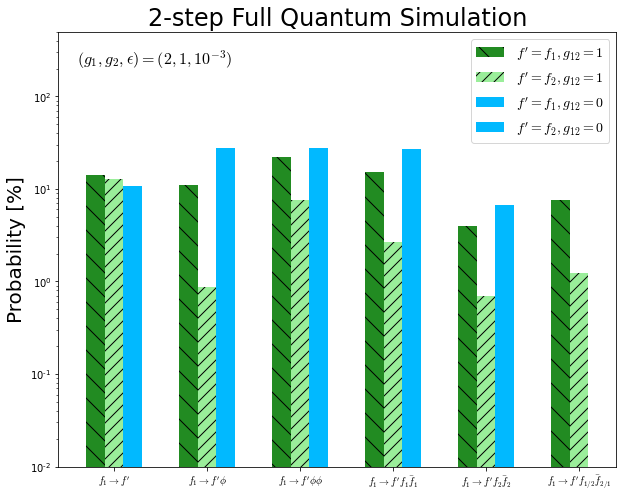

In [89]:
# Note: make sure the first counts parameters is g12=1, and the optional counts2 parameter is g12=0.
#print(counts1)

# Plot the final particle configuration
pl.bar_plot2(counts1, shots, eps, g_1, g_2, counts2= counts0, save=False, wReg=False)

## Another diagnostic plot

ymax= 0.65


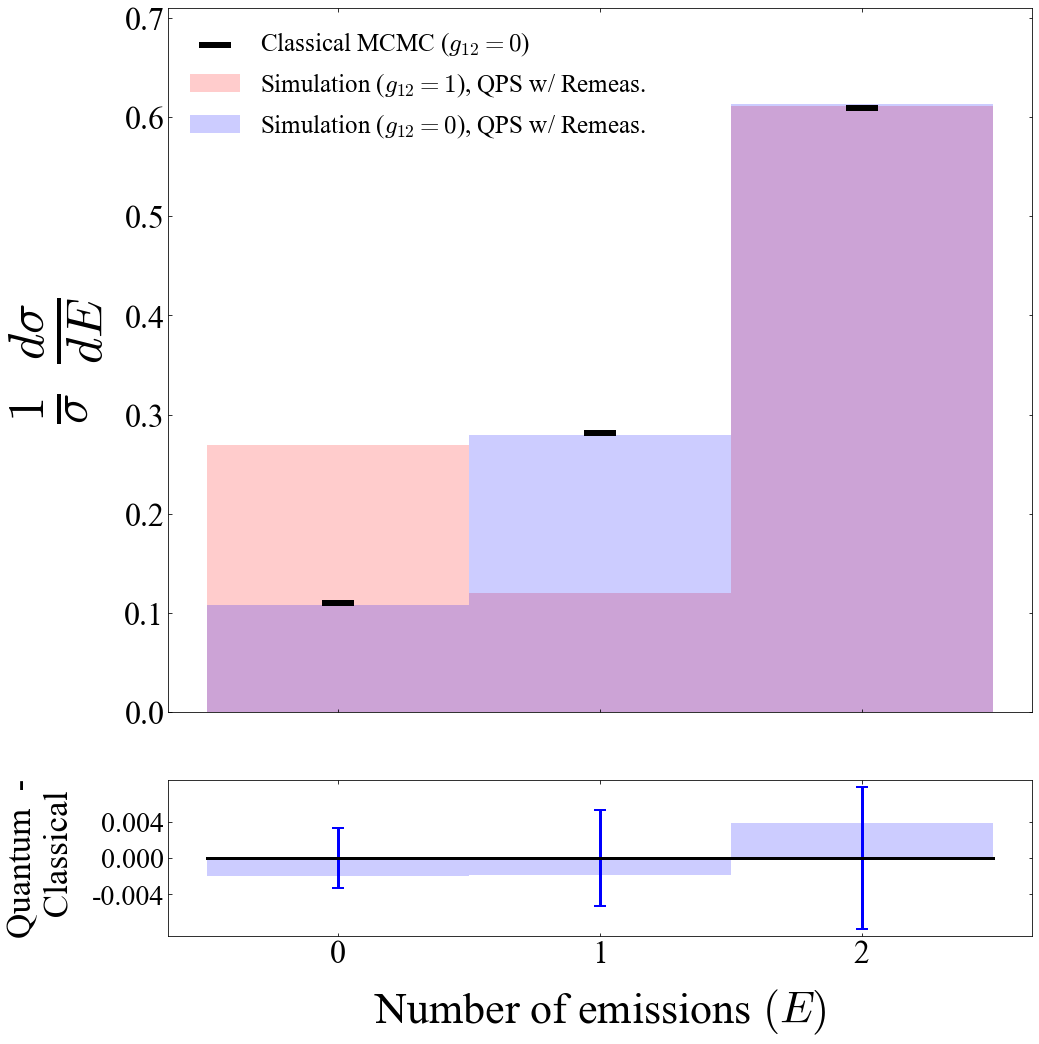

In [91]:
# Note that for the hard-coded circuit, there is no work register wReg, so meake sure
# wmeas= False for the paper plot.
mcmc_shots= int(1e5)
#mcmc= np.load('./data/mcmc_%dstep_na=%d_nb=%d_shots=%s.npy' %(N, 1, 0, '{:.0e}'.format(mcmc_shots)))
mcmc= classical.MCMC(int(1e5), eps, g_1, g_2, 1, 0, 2, verbose=False)
p.master_plot_emissions(g_1, g_2, N, 1, shots, counts1, counts0, mcmc= mcmc, save=False, old_alg=None, wmeas=False)

## Draw the circuit

In [32]:
qcT= compiler.transpile(qc0, basis_gates=['u3', 'h', 'z', 'y', 'x', 'cx'], optimization_level= 1)
print('Transpiled Gates: ' + str(qcT.count_ops()))
print(qc0.count_ops())
qc0.draw()

Transpiled Gates: OrderedDict([('u3', 32), ('cx', 18), ('x', 17), ('measure', 14), ('reset', 3), ('h', 1)])
OrderedDict([('x', 20), ('measure', 14), ('cu3', 8), ('reset', 3), ('cry', 3), ('cx', 2), ('ry', 1), ('h', 1), ('u3', 1)])


┌───────┐┌───┐                  ┌───┐                  ┌───┐     »
    p_0: ┤ Ry(0) ├┤ X ├────────■─────────┤ X ├────────■─────────┤ X ├─────»
         └───────┘└┬─┬┘        │         └───┘        │         └───┘     »
    p_1: ──────────┤M├─────────┼──────────────────────┼───────────────────»
           ┌───┐   └╥┘         │                      │                   »
    p_2: ──┤ X ├────╫──────────┼──────────────────────┼───────────────────»
           └───┘    ║          │                      │                   »
    p_3: ───────────╫──────────┼──────────────────────┼───────────────────»
                    ║          │                      │                   »
    p_4: ───────────╫──────────┼──────────────────────┼───────────────────»
                    ║          │                      │                   »
    p_5: ───────────╫──────────┼──────────────────────┼───────────────────»
                    ║          │                      │                   »
    p_6: ───────────╫──────────┼──────────────────────┼───────────────────»
                    ║          │                      │                   »
    p_7: ───────────╫──────────┼──────────────────────┼───────────────────»
                    ║          │                      │                   »
    p_8: ───────────╫──────────┼──────────────────────┼───────────────────»
                    ║          │                      │                   »
    h_0: ───────────╫──────────┼──────────────────────┼───────────────────»
                    ║          │                      │                   »
    h_1: ───────────╫──────────┼──────────────────────┼───────────────────»
                    ║  ┌───────┴────────┐     ┌───────┴────────┐ ┌─┐      »
      e: ───────────╫──┤ U3(1.9112,0,0) ├─────┤ U3(1.0247,0,0) ├─┤M├──|0>─»
                    ║  └────────────────┘     └────────────────┘ └╥┘      »
p0_cl: 3/═══════════╩═════════════════════════════════════════════╬═══════»
                    1                                             ║       »
p1_cl: 3/═════════════════════════════════════════════════════════╬═══════»
                                                                  ║       »
p2_cl: 3/═════════════════════════════════════════════════════════╬═══════»
                                                                  ║       »
h0_cl: 3/═════════════════════════════════════════════════════════╩═══════»
                                                                  2       »
h1_cl: 3/═════════════════════════════════════════════════════════════════»
                                                                          »
«                                                 ┌───┐                  ┌───┐»
«    p_0: ──────────────────────────────■─────────┤ X ├────────■─────────┤ X ├»
«                                       │         └───┘        │         └───┘»
«    p_1: ──────────────────────────────┼──────────────────────┼──────────────»
«                                       │                      │              »
«    p_2: ──────────────────────────────┼──────────────────────┼──────────────»
«                         ┌───┐         │                      │              »
«    p_3: ────────────────┤ X ├─────────┼──────────────────────┼──────────────»
«                         └─╥─┘         │                      │              »
«    p_4: ──────────────────╫───────────┼──────────────────────┼──────────────»
«                           ║           │                      │              »
«    p_5: ──────────────────╫───────────┼──────────────────────┼──────────────»
«                           ║           │                      │              »
«    p_6: ──────────────────╫───────────┼──────────────────────┼──────────────»
«                           ║           │                      │              »
«    p_7: ──────────────────╫───────────┼──────────────────────┼──────────────»
«                           ║           │                      │     